# ECE 763 Project 01: Face Detection
## faceScrub dataset

In [1]:
%matplotlib inline 
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

### Methods

In [2]:
def buildDataset(actors_list):
  img_set = [] # empty list
  for actor in tqdm(actors_list, total=len(actors_list) ,desc='Loading dataset'):
    img0 = {} # empty dictionary
    img1 = {} # empty dictionary
    try:
      # create dictionary and add it to the list
      img0['file'] = actor['0']
      img0['class'] = 0
      img0['image'] = Image.open(actor['0'])
      img_set.append(img0)
      img1['file'] = actor['1']
      img1['class'] = 1
      img1['image'] = Image.open(actor['1'])
      img_set.append(img1)
    except:
      print(actor['name'] + " couldn't be found!")
  return img_set

Load datasets into memmory

In [3]:
test_actors = []
train_actors = []

test_file = './data/test/test.txt'
train_file = './data/training/training.txt'

# Read test data
with open(test_file, newline='') as actors:
    actors_reader = csv.DictReader(actors, delimiter='\t')
    for actor in actors_reader:
        test_actors.append(actor)

# Read training data
with open(train_file, newline='') as actors:
    actors_reader = csv.DictReader(actors, delimiter='\t')
    for actor in actors_reader:
        train_actors.append(actor)

# Build datasets
test_set = buildDataset(test_actors)
train_set = buildDataset(train_actors)

Loading dataset: 100%|██████████| 1000/1000 [00:00<00:00, 3043.85it/s]


Concatenate RGB values and normalize data

In [4]:
# Convert images to np array
for face in test_set:
    face['image'] = np.asfarray(face['image']).flatten() / 255.0
for face in train_set:
    face['image'] = np.asfarray(face['image']).flatten() / 255.0

# Inspect data
print('Sample from test set: ')
print(test_set[0]['image'])
print('shape: ' , test_set[0]['image'].shape)
print('Sample from training set: ')
print(train_set[0]['image'])
print('shape: ' , test_set[0]['image'].shape)

Sample from test set: 
[0.4        0.42745098 0.63137255 ... 0.24313725 0.28235294 0.41960784]
shape:  (1200,)
Sample from training set: 
[0.41568627 0.21960784 0.17647059 ... 0.4        0.25098039 0.2       ]
shape:  (1200,)


Crete training class subsets and X matrix

In [5]:
# Create vectors of training data
X0_subset = [ face for face in train_set if face['class']==0 ]
X1_subset = [ face for face in train_set if face['class']==1 ]
x_len = train_set[0]['image'].shape[0]

X0 = np.empty( (x_len,len(X0_subset)) )
X1 = np.empty( (x_len,len(X1_subset)) )

for i,face in enumerate(X0_subset):
    try:
        X0[:,i] = face['image']
    except:
        print(i, face['image'].shape, face['file'])

for i,face in enumerate(X1_subset):
    X1[:,i] = face['image']

# Sanity check
print('X0 shape: ' , X0.shape)
print('X1 shape: ' , X1.shape)

X0 shape:  (1200, 1000)
X1 shape:  (1200, 1000)


Compute sample mean vector and sample covariance matrix

In [6]:
# Mean
mu0 = X0.mean(axis=1)
mu1 = X1.mean(axis=1)

# Variance
sigma0 = np.cov(X0, bias=True)
sigma1 = np.cov(X1, bias=True)

print('X0 mean = ', mu0)
print('X1 mean = ', mu1)
print('X0 cov  = ', sigma0)
print('X1 cov  = ', sigma1)

X0 mean =  [0.43417255 0.38098431 0.35311373 ... 0.42512549 0.37319216 0.34605882]
X1 mean =  [0.35471373 0.28687451 0.24862745 ... 0.4491451  0.39176471 0.36153725]
X0 cov  =  [[0.10208597 0.08866525 0.081672   ... 0.07341677 0.06261226 0.05826928]
 [0.08866525 0.08856834 0.08510363 ... 0.06230632 0.06152965 0.06014155]
 [0.081672   0.08510363 0.08769996 ... 0.05818184 0.06061282 0.06360285]
 ...
 [0.07341677 0.06230632 0.05818184 ... 0.10229809 0.08837205 0.08112465]
 [0.06261226 0.06152965 0.06061282 ... 0.08837205 0.08649979 0.08331823]
 [0.05826928 0.06014155 0.06360285 ... 0.08112465 0.08331823 0.08616601]]
X1 cov  =  [[0.06755294 0.05953922 0.05489733 ... 0.01027572 0.00766113 0.00684062]
 [0.05953922 0.06169248 0.05886031 ... 0.00780127 0.00592142 0.00526898]
 [0.05489733 0.05886031 0.06020254 ... 0.00702101 0.00501865 0.00480326]
 ...
 [0.01027572 0.00780127 0.00702101 ... 0.09499548 0.08696977 0.08100147]
 [0.00766113 0.00592142 0.00501865 ... 0.08696977 0.08762541 0.08480419

Visualize the estimated mean and covariance matrix for face and non-face respectively

Text(0.5, 1.0, '$\\Sigma_1^{diag}$')

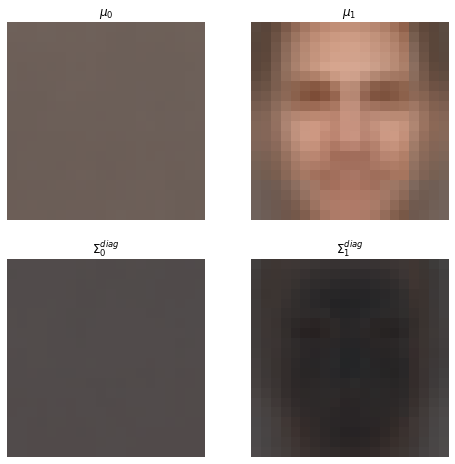

In [39]:
# Reshape mean vector
def convertToImg(x, img_size):
    return ((x * 255.0).reshape(img_size[0],img_size[1],-1)).astype(int)
    
mu0_img = convertToImg(mu0, (20,20))
mu1_img = convertToImg(mu1, (20,20))

sigma0_img = convertToImg(np.sqrt(sigma0.diagonal()), (20,20))
sigma1_img = convertToImg(np.sqrt(sigma1.diagonal()), (20,20))

# Plot code
fig, axes = plt.subplots(2,2, figsize=(8,8))
[axi.axis('off') for axi in axes.flat] # hide axis

axes[0,1].imshow(mu1_img)
axes[0,1].set_title(r'$\mu_1$')
axes[0,0].imshow(mu0_img)
axes[0,0].set_title(r'$\mu_0$')
axes[1,0].imshow(sigma0_img)
axes[1,0].set_title(r'$\Sigma_0^{diag}$')
axes[1,1].imshow(sigma1_img)
axes[1,1].set_title(r'$\Sigma_1^{diag}$')